In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn import preprocessing

# Load the Dataset Wine

In [2]:
wine = pd.read_csv("Datasets/winequality/winequality-red.csv", sep=';')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Preorcessing 
## 1) simplest method for the target coloum is to seperate the quality in good or bad (0,1) 

In [4]:
bins = (2, 6.5, 8) # stets the cut which diveide the values in 0 or 1
group_names = ["bad", "good"]
wine["quality"] = pd.cut(wine["quality"], bins = bins, labels = group_names)
#wine["quality"].unique()
label_quality = LabelEncoder()

wine["quality"] = label_quality.fit_transform(wine["quality"])

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [6]:
wine["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [7]:
X = wine.drop("quality", axis=1)
y = wine["quality"]

In [ ]:
scaling = MinMaxScaler()
scaling.fit_transform(X)

In [ ]:
X = wine.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X_norm = pd.DataFrame(x_scaled)

In [ ]:
X_norm.head()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.mean()

In [9]:
from sklearn.preprocessing import StandardScaler  # doctest: +SKIP
scaler = StandardScaler()  # doctest: +SKIP
# Don't cheat - fit only on training data
scaler.fit(X_train)  # doctest: +SKIP
X_train = scaler.transform(X_train)  # doctest: +SKIP
# apply same transformation to test data
X_test = scaler.transform(X_test)  # doctest: +SKIP

# MLP Classifier

In [10]:
# Stets some parameters for looking for the best parameters
modes = ["identity","logistic","tanh","relu"]
alphas = [1e-5,1e-4,1e-3,0.01,0.1,0,1,10,100]
solv = ["adam","sgd","lbfgs"]
h = [10,100,200,400,500,800,1000]
#h = [10,100]

In [11]:
#alphas = [0.01]
#erg = []
#for l in h:
#    for i in alphas:
#        for j in modes:
#            for k in solv:
#                clf = MLPClassifier(alpha=i, max_iter=500,activation=j,hidden_layer_sizes=(l,l,l),solver=k)
#                #clf = MLPClassifier(hidden_layer_sizes=(500,500,500), max_iter=300, alpha=i,solver='sgd', verbose=10,  #random_state=21,tol=0.000000001,activation=j)
#                clf.fit(X_train, y_train)
#                Y_pred = clf.predict(X_test)
#                print("hidden_size: ",l,"alpha: ",i,"mode: ",j,"solver: ",k,"score: ",accuracy_score(y_test, Y_pred))
#                erg.append("hidden_size:")
#                erg.append(h)
#                erg.append("alpha:")
#                erg.append(i)
#                erg.append("mode:")
#                erg.append(j)
#                erg.append("solver:")
#                erg.append(k)
#                erg.append("score:")
#                erg.append(accuracy_score(y_test, Y_pred))
#            print("")
#        print("")
#    print("")
#print("")

In [13]:
l = 400
clf = MLPClassifier(max_iter=500,activation="relu",hidden_layer_sizes=(l,l,l),alpha=0.001)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
print("hidden_size: ",l,"score: ",accuracy_score(y_test, Y_pred))

Cost = clf.predict_proba(X_test)

hidden_size:  400 score:  0.8916666666666667


In [22]:
Cost[:,1]

array([2.87736141e-11, 2.07088109e-13, 3.84214984e-11, 1.36948580e-04,
       2.59162603e-09, 5.89410120e-14, 3.31083495e-06, 2.74611574e-09,
       9.27384998e-01, 9.98410005e-01, 3.11985807e-08, 5.95035434e-07,
       1.84765734e-05, 5.45517723e-12, 7.50116326e-10, 3.05084199e-04,
       9.42365961e-13, 4.36082334e-14, 2.67418389e-22, 3.90090922e-19,
       2.19151739e-08, 4.54985555e-05, 3.00112208e-08, 3.12386633e-04,
       3.60478883e-16, 1.12983488e-06, 6.60436247e-30, 2.88764729e-13,
       2.89250555e-02, 7.67545598e-05, 3.62750915e-14, 1.42070605e-05,
       1.84771408e-02, 1.11093418e-10, 8.65177980e-08, 1.92752593e-08,
       5.21908011e-08, 1.47241694e-06, 9.88844224e-01, 1.84623845e-10,
       4.17524583e-13, 3.03336983e-18, 4.20362913e-17, 3.92224185e-07,
       1.08596368e-04, 5.53827372e-08, 7.42121392e-15, 4.46107500e-06,
       9.99952639e-01, 1.51505900e-08, 1.72755881e-11, 9.37942016e-03,
       9.52131538e-12, 6.32251494e-04, 5.56172390e-08, 2.64991309e-26,
      

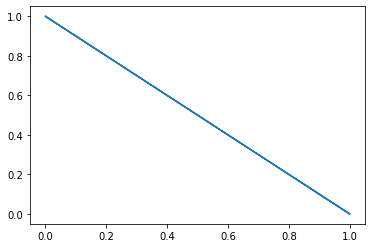

In [20]:
plt.plot(Cost[:,0],Cost[:,1])

## Statistics

In [ ]:
sns.distplot(y_test)
sns.distplot(Y_pred, color="red")

In [ ]:
sns.distplot(y_test-Y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print(sqrt(mean_squared_error(y_test, Y_pred)))

# knn Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#scaler = StandardScaler()
#scaler.fit(wine.drop('quality', axis=1))
#wine.head()

#scaled_features = scaler.transform(wine.drop('quality', axis=1))
#df_feat = pd.DataFrame(scaled_features, columns=wine.columns[:-1])
#df_feat.head()

In [ ]:
X = df_feat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
error_rate = []

for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i)) # maybe pointless?

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,51), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs k-Value')
plt.xlabel('k-Value')
plt.ylabel('Error rate')

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': range(1, 51)}

knn = KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=10)
model.fit(X_train, y_train)
print("Best k-Value is: ", model.best_params_['n_neighbors'])

In [ ]:
pred = model.predict(X_test)

In [ ]:
solution_data = list(zip(list(range(750,1500)), pred))

In [ ]:
solution_table = pd.DataFrame(solution_data, columns=['ID', 'quality'])
solution_table.head()

In [ ]:
sns.distplot(y_test)
sns.distplot(pred, color="red")

In [ ]:
sns.distplot(y_test-pred)

In [ ]:
print(sqrt(mean_squared_error(y_test, pred)))

# Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=900)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

In [ ]:
sns.distplot(y_test)
sns.distplot(pred_rfc, color="red")

In [ ]:
sns.distplot(y_test-pred_rfc)

In [ ]:
print(sqrt(mean_squared_error(y_test, pred_rfc)))